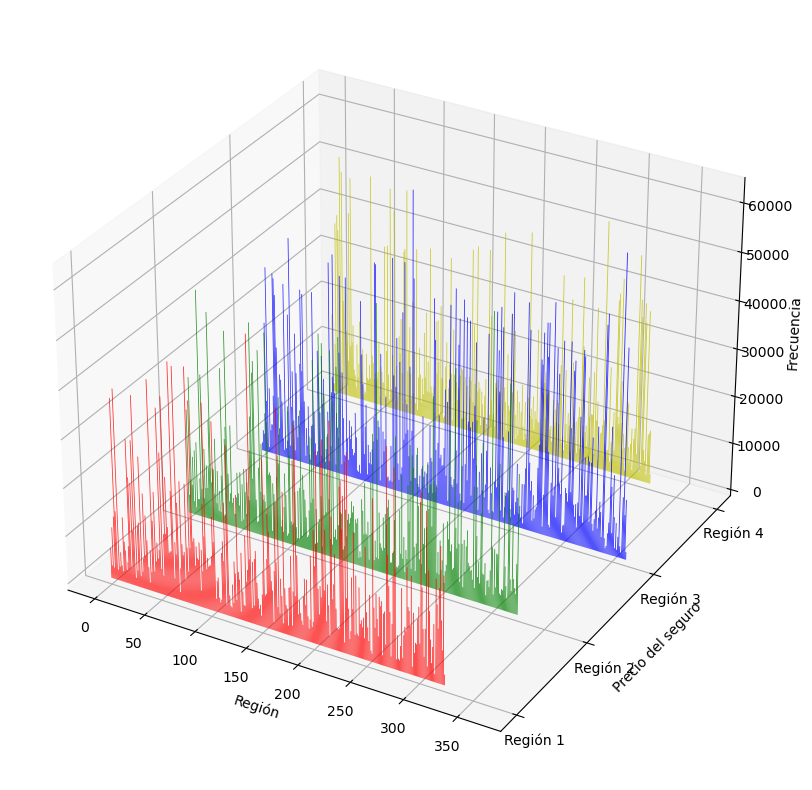

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Ruta y Fuente de datos
path = "C:/Users/Vespertino/Documents/iris/"
datos = pd.read_csv(path + "insurance.csv", sep = ",")

# Obtener datos de carga de seguro y frecuencia para cada región
charges_by_region = datos[["charges", "region"]]
data = []
freq = []
for region, d in charges_by_region.groupby("region"):
    data.append(d["charges"].values)
    freq.append(d["charges"].count())

# Generar una lista de colores para cada región
colors = ['r', 'g', 'b', 'y']

# Crear la figura y el subplot 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Agregar barras para cada región
for i, d in enumerate(data):
    xs = np.arange(len(d))
    ys = d
    cs = [colors[i]] * len(xs)
    ax.bar(xs, ys, zs=i, zdir='y', color=cs, alpha=0.8)

# Configurar los ejes y agregar etiquetas
ax.set_xlabel('Región')
ax.set_ylabel('Precio del seguro')
ax.set_zlabel('Frecuencia')
ax.set_yticks(np.arange(len(data)))
ax.set_yticklabels(["Región "+str(i+1) for i in range(len(data))])

# Mostrar el gráfico
plt.show()


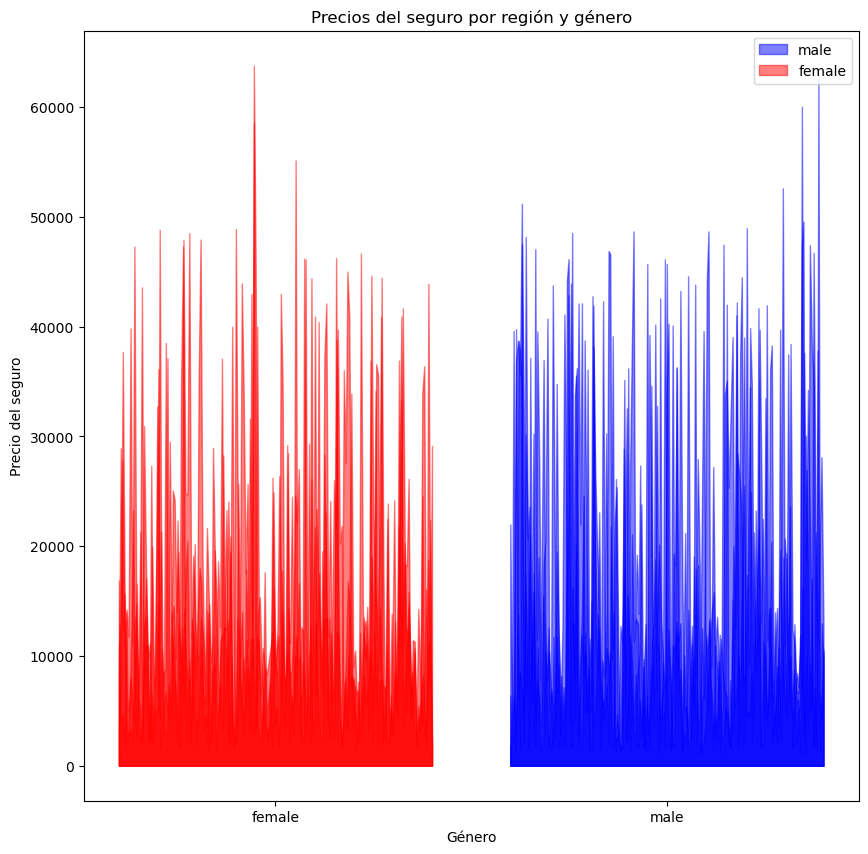

In [6]:
# Obtener datos de carga de seguro y frecuencia para cada región y género
charges_by_region_and_gender = datos[["charges", "region", "sex"]]
data = {}
for region, d in charges_by_region_and_gender.groupby("region"):
    data[region] = {}
    for gender, gd in d.groupby("sex"):
        data[region][gender] = gd["charges"].values

# Generar una lista de colores para cada género
colors = {'male':'b', 'female':'r'}

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10,10))

# Agregar polígonos para cada región y género
for i, (region, genders) in enumerate(data.items()):
    for j, (gender, charges) in enumerate(genders.items()):
        x = np.linspace(j-0.4, j+0.4, len(charges))
        y = charges
        ax.fill_between(x, y, color=colors[gender], alpha=0.5)
    ax.set_xticks(range(len(genders)))
    ax.set_xticklabels(list(genders.keys()))
    ax.set_title('Precios del seguro por región y género')
    ax.set_xlabel('Género')
    ax.set_ylabel('Precio del seguro')

# Agregar leyenda
handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.5) for color in colors.values()]
labels = list(colors.keys())
ax.legend(handles, labels)

# Mostrar el gráfico
plt.show()

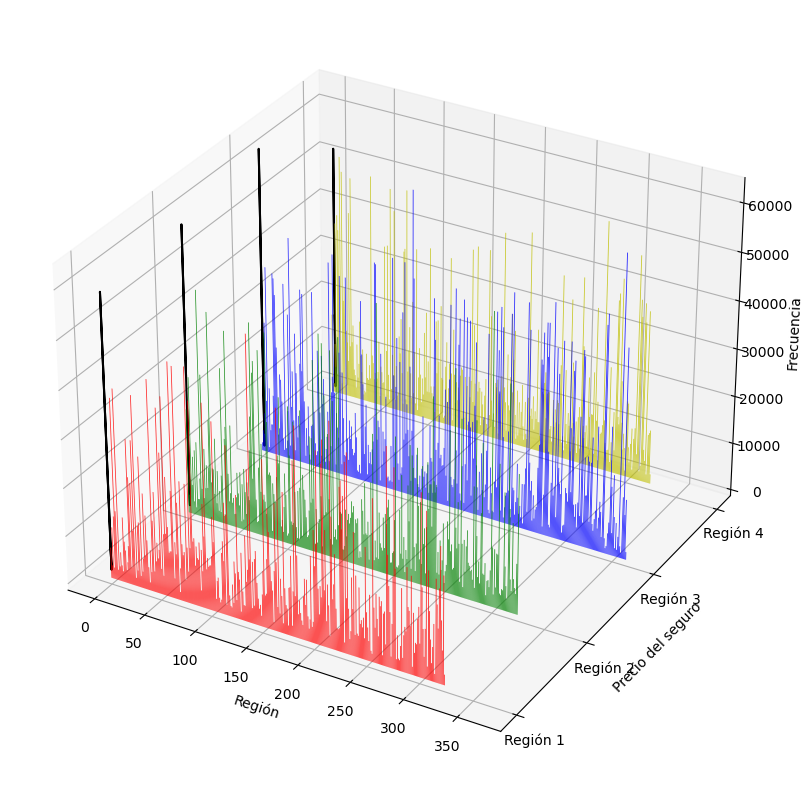

In [7]:
# Obtener datos de carga de seguro y frecuencia para cada región
charges_by_region = datos[["charges", "region"]]
data = []
freq = []
for region, d in charges_by_region.groupby("region"):
    data.append(d["charges"].values)
    freq.append(d["charges"].count())

# Generar una lista de colores para cada región
colors = ['r', 'g', 'b', 'y']

# Crear la figura y el subplot 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Agregar barras para cada región
for i, d in enumerate(data):
    xs = np.arange(len(d))
    ys = d
    cs = [colors[i]] * len(xs)
    ax.bar(xs, ys, zs=i, zdir='y', color=cs, alpha=0.8)

# Plot 2D data on 3D plot
for i, d in enumerate(data):
    ax.plot(np.ones(len(d))*i, d, zs=i, zdir='y', color='black')

# Configurar los ejes y agregar etiquetas
ax.set_xlabel('Región')
ax.set_ylabel('Precio del seguro')
ax.set_zlabel('Frecuencia')
ax.set_yticks(np.arange(len(data)))
ax.set_yticklabels(["Región "+str(i+1) for i in range(len(data))])

# Mostrar el gráfico
plt.show()